In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
data = pd.read_csv('clean_data.csv')
features = data.drop(columns=['Unnamed: 0', 'univName', 'year'])
#features = features.drop(columns=['researchExp', 'industryExp', 'internExp','journalPubs','confPubs'])
features = shuffle(features)
labels = features.pop('admit')
features.head()

,researchExp,industryExp,internExp,greV,greQ,journalPubs,confPubs,targetRank
12518,0,0,0.0,165.0,164.0,0,0,32
26844,0,0,0.0,158.0,161.0,0,0,66
3770,0,50,0.0,150.0,167.0,0,0,62
16674,0,0,0.0,168.0,166.0,0,0,10
9782,0,0,0.0,147.0,159.0,0,0,11


In [4]:
# Use 20% test split (80% training + validation)
ntrain = int(len(features)*0.8)
x_train = features.iloc[:ntrain,:]
y_train = labels[:ntrain]
x_test = features.iloc[ntrain:,:]
y_test = labels[ntrain:]

scaler = MinMaxScaler() #scale features between 0 and 1
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [52]:
clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=8, max_depth=10, random_state=1)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [53]:
y_test = np.array(y_test)
print('accuracy: {}'.format(sum(y_pred == y_test)/len(y_test)))
print('precision: {}'.format(sum(y_pred+y_test==2)/sum(y_pred==1)))
print('recall: {}'.format(sum(y_pred+y_test==2)/sum(y_test==1)))

accuracy: 0.6804597701149425
precision: 0.6938013442867812
recall: 0.6866223207686623


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


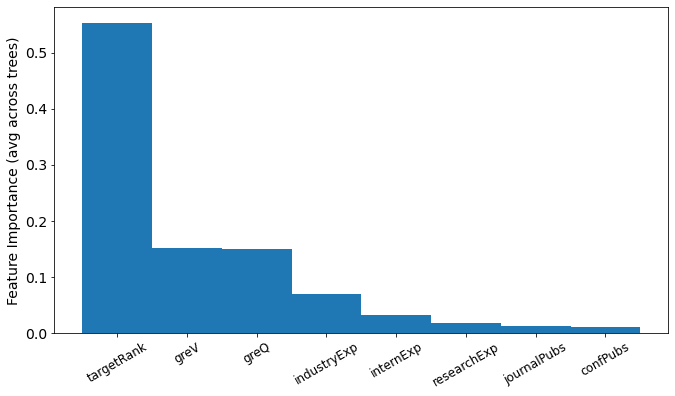

In [54]:
nfeatures = 8
fi = clf.feature_importances_ # get feature importances
fi_sort = np.argsort(fi)[::-1] # sort importances most to least
plt.figure(figsize=(11,6))
plt.bar(range(nfeatures), fi[fi_sort[0:nfeatures]], width=1, \
        tick_label=features.columns.values[[fi_sort[0:nfeatures]]]) # plot features importances
plt.ylabel('Feature Importance (avg across trees)', fontsize=14)
plt.xticks(rotation = 30, fontsize=12)
plt.yticks(fontsize=14)
plt.show()